In [2]:
import pandas as pd
import numpy as np
import os
from joblib import Parallel, delayed
from tqdm import tqdm
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)

pd.set_option('display.max_columns', 100)

In [3]:
df_history_action = pd.read_pickle('./temp/action_history.plk')
df_feature = pd.read_pickle('./temp/base_feature.plk')
df_courier = pd.read_pickle('./temp/courier.plk')
df_order = pd.read_pickle('./temp/order.plk')
df_distance = pd.read_pickle('./temp/distance.plk')

In [212]:
df_actions = []
for f in os.listdir(os.path.join(train_path, 'action')):
    date = f.split('.')[0].split('_')[1]
    df = pd.read_csv(os.path.join(train_path, 'action', f))
    df['date'] = date
    df['type'] = 'train'
    df_actions.append(df)

for f in os.listdir(os.path.join(test_path, 'action')):
    date = f.split('.')[0].split('_')[1]
    df = pd.read_csv(os.path.join(test_path, 'action', f))
    df['date'] = date
    df['type'] = 'test'
    df_actions.append(df)

100%|██████████| 35/35 [00:16<00:00,  2.09it/s]


In [63]:
df_actions[0].sort_values(['courier_id','wave_index','expect_time'])
df_actions[0][ (df_actions[0]['courier_id']==10007871)]

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,action_type,expect_time,date,type
128,10007871,1,2100074962622579871,121.622786,39.140874,PICKUP,1581397022,20200211,train
129,10007871,1,2100074962270881705,121.622786,39.140874,PICKUP,1581397086,20200211,train
130,10007871,1,2100074961453910001,121.622786,39.140874,PICKUP,1581397088,20200211,train
131,10007871,1,2100074962622579871,121.622786,39.140874,DELIVERY,1581397260,20200211,train
132,10007871,1,2100074962270881705,121.622786,39.140874,DELIVERY,1581397769,20200211,train
133,10007871,1,2100074961453910001,121.622786,39.140874,DELIVERY,1581397985,20200211,train
134,10007871,2,2100074964666877093,121.631210,39.142612,PICKUP,1581399776,20200211,train
135,10007871,2,2100074964666877093,121.631210,39.142612,DELIVERY,1581400078,20200211,train
136,10007871,2,2100074963981239588,121.631210,39.142612,PICKUP,1581401243,20200211,train
137,10007871,2,2100074963981239588,121.631210,39.142612,DELIVERY,1581401385,20200211,train


In [51]:
df_courier[(df_courier['date']=='20200211') & (df_courier['courier_id']==10007871)]

,courier_id,level,speed,max_load,date
418,10007871,2,5.683323,11,20200211


In [53]:
df_order[(df_order['date']=='20200211') & (df_order['courier_id']==10007871)]

,courier_id,wave_index,tracking_id,weather_grade,pick_lng,pick_lat,deliver_lng,deliver_lat,create_time,confirm_time,assigned_time,promise_deliver_time,estimate_pick_time,aoi_id,shop_id,date
64,10007871,1,2100074961453910001,轻微恶劣天气,121.631641,39.141797,121.648914,39.139581,1581395706,1581395706,1581395716,1581399066,1581396846,81bdfc76480db597e248ecd030b3aa2f,ee5bfba8796b6beeed3329da7fb917a7,20200211
65,10007871,1,2100074962270881705,轻微恶劣天气,121.631557,39.142162,121.635814,39.138911,1581395864,1581395870,1581395894,1581398444,1581397070,3c0081445ddd547a540f1efb86efba41,8b4a27641b2399ddadfec66d5048179a,20200211
66,10007871,1,2100074962622579871,轻微恶劣天气,121.631100,39.143111,121.632144,39.142371,1581395935,1581395943,1581395954,1581398155,1581397083,898aef0932f6aaecda27aba8e9903991,33aadb1eb3a1c258177ccbed839ce1b1,20200211
67,10007871,2,2100074963981239588,轻微恶劣天气,121.629954,39.141577,121.629564,39.147471,1581399314,1581399317,1581399374,1581401894,1581400577,f3ce7eb378ad3c10089e73af381e9d2f,45c415d7de6b93cebd0ec2af53c32542,20200211
68,10007871,2,2100074964666877093,轻微恶劣天气,121.631114,39.141721,121.628814,39.141881,1581399339,1581399470,1581399494,1581401139,1581400310,48d4167a0f3bc10686a1ad20a8008c73,73a38fd129116d3d40f66cf43bd600c1,20200211
69,10007871,2,2100074968045618362,轻微恶劣天气,121.629930,39.144603,121.631734,39.163651,1581401073,1581401074,1581401294,1581403353,1581401794,2db18acb13cd6081d74c5c02e6448e68,34887bf8e1a0de848d271bc6b7059670,20200211
70,10007871,3,2100074971327857745,轻微恶劣天气,121.631515,39.141732,121.632084,39.146221,1581405290,1581405297,1581405314,1581408290,1581406257,b71df7214347524a0f5f0c79dfdf2f4e,10f44d4e18485e79c5bda0361819411b,20200211
71,10007871,3,2100074971070760122,轻微恶劣天气,121.629930,39.144603,121.631564,39.140161,1581406064,1581406064,1581406095,1581407984,1581406784,97879ec156dcc0b9f08f2802fdf2a010,34887bf8e1a0de848d271bc6b7059670,20200211
72,10007871,3,2100074969651546025,轻微恶劣天气,121.631557,39.142162,121.633984,39.127721,1581406205,1581406211,1581406214,1581409085,1581407471,5710eb116f27527390bec7aa5cedb44d,8b4a27641b2399ddadfec66d5048179a,20200211
73,10007871,3,2100074971767964837,轻微恶劣天气,121.631114,39.141721,121.642714,39.133471,1581406907,1581407030,1581407054,1581409367,1581407987,7db1328d9b87e434c30575065848ba02,73a38fd129116d3d40f66cf43bd600c1,20200211


In [59]:
df_distance[(df_distance['date']=='20200211') 
            & (df_distance['courier_id']==10007871) 
            & (df_distance['wave_index']==1) 
            & (df_distance['tracking_id']==2100074961453910001) ]

,courier_id,wave_index,tracking_id,source_type,source_lng,source_lat,target_tracking_id,target_type,target_lng,target_lat,grid_distance,date,group
1914,10007871,1,2100074961453910001,ASSIGN,121.622786,39.140874,2100074962270881705,ASSIGN,121.631008,39.142298,943.0,20200211,20200211100078711
1915,10007871,1,2100074961453910001,ASSIGN,121.622786,39.140874,2100074962622579871,ASSIGN,121.631244,39.142263,943.0,20200211,20200211100078711
1916,10007871,1,2100074961453910001,ASSIGN,121.622786,39.140874,2100074962270881705,DELIVERY,121.635814,39.138911,1471.0,20200211,20200211100078711
1917,10007871,1,2100074961453910001,ASSIGN,121.622786,39.140874,2100074961453910001,DELIVERY,121.648914,39.139581,2405.0,20200211,20200211100078711
1918,10007871,1,2100074961453910001,ASSIGN,121.622786,39.140874,2100074962622579871,DELIVERY,121.632144,39.142371,1266.0,20200211,20200211100078711
1919,10007871,1,2100074961453910001,ASSIGN,121.622786,39.140874,2100074961453910001,PICKUP,121.631641,39.141797,825.0,20200211,20200211100078711
1920,10007871,1,2100074961453910001,ASSIGN,121.622786,39.140874,2100074962622579871,PICKUP,121.631100,39.143111,1001.0,20200211,20200211100078711
1921,10007871,1,2100074961453910001,ASSIGN,121.622786,39.140874,2100074962270881705,PICKUP,121.631557,39.142162,980.0,20200211,20200211100078711
1922,10007871,1,2100074961453910001,PICKUP,121.631641,39.141797,2100074961453910001,ASSIGN,121.622786,39.140874,843.0,20200211,20200211100078711
1927,10007871,1,2100074961453910001,DELIVERY,121.648914,39.139581,2100074961453910001,ASSIGN,121.622786,39.140874,2688.0,20200211,20200211100078711


In [71]:
df_actions[29][ (df_actions[29]['courier_id']==117108873)]

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,action_type,expect_time,date,type
0,117108873,1,2100076103321159032,121.523381,39.133412,PICKUP,1583115328,20200302,test
1,117108873,1,2100076102441436536,121.523381,39.133412,PICKUP,1583115330,20200302,test
2,117108873,1,2100076102441436536,121.523381,39.133412,DELIVERY,1583116219,20200302,test
3,117108873,1,2100076103321159032,121.523381,39.133412,DELIVERY,0,20200302,test
4,117108873,1,2100076105276393185,121.523381,39.133412,DELIVERY,0,20200302,test
5,117108873,1,2100076105276393185,121.523381,39.133412,PICKUP,0,20200302,test
6,117108873,5,2100076154422494584,121.525698,39.132961,PICKUP,1583142379,20200302,test
7,117108873,5,2100076154755712050,121.525698,39.132961,PICKUP,1583142751,20200302,test
8,117108873,5,2100076154422494584,121.525698,39.132961,DELIVERY,1583143328,20200302,test
9,117108873,5,2100076154755712050,121.525698,39.132961,DELIVERY,1583143825,20200302,test


In [66]:
df_actions[0][ (df_actions[0]['courier_id']==10007871) 
              & (df_actions[0]['wave_index']==2) ]

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,action_type,expect_time,date,type
134,10007871,2,2100074964666877093,121.63121,39.142612,PICKUP,1581399776,20200211,train
135,10007871,2,2100074964666877093,121.63121,39.142612,DELIVERY,1581400078,20200211,train
136,10007871,2,2100074963981239588,121.63121,39.142612,PICKUP,1581401243,20200211,train
137,10007871,2,2100074963981239588,121.63121,39.142612,DELIVERY,1581401385,20200211,train
138,10007871,2,2100074968045618362,121.63121,39.142612,PICKUP,1581401829,20200211,train
139,10007871,2,2100074968045618362,121.63121,39.142612,DELIVERY,1581402114,20200211,train


In [67]:
df_order[(df_order['date']=='20200211') 
         & (df_order['courier_id']==10007871)
         & (df_order['wave_index']==2) ]

,courier_id,wave_index,tracking_id,weather_grade,pick_lng,pick_lat,deliver_lng,deliver_lat,create_time,confirm_time,assigned_time,promise_deliver_time,estimate_pick_time,aoi_id,shop_id,date
67,10007871,2,2100074963981239588,轻微恶劣天气,121.629954,39.141577,121.629564,39.147471,1581399314,1581399317,1581399374,1581401894,1581400577,f3ce7eb378ad3c10089e73af381e9d2f,45c415d7de6b93cebd0ec2af53c32542,20200211
68,10007871,2,2100074964666877093,轻微恶劣天气,121.631114,39.141721,121.628814,39.141881,1581399339,1581399470,1581399494,1581401139,1581400310,48d4167a0f3bc10686a1ad20a8008c73,73a38fd129116d3d40f66cf43bd600c1,20200211
69,10007871,2,2100074968045618362,轻微恶劣天气,121.629930,39.144603,121.631734,39.163651,1581401073,1581401074,1581401294,1581403353,1581401794,2db18acb13cd6081d74c5c02e6448e68,34887bf8e1a0de848d271bc6b7059670,20200211


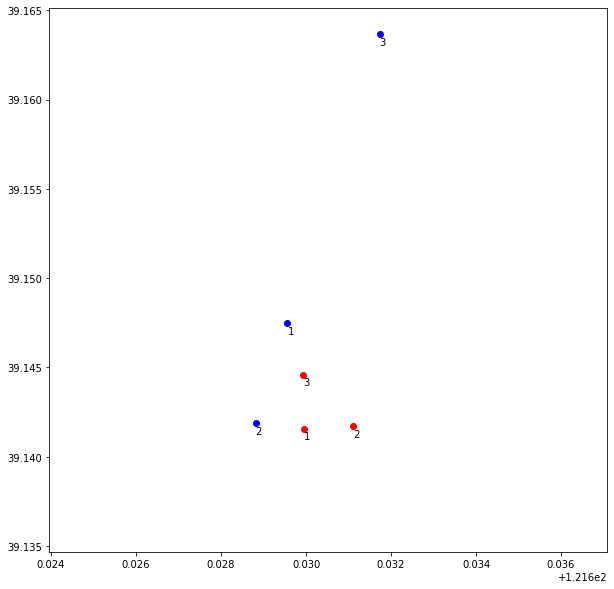

In [68]:
test_order_image=df_order[(df_order['date']=='20200211') 
                          & (df_order['courier_id']==10007871) 
                          & (df_order['wave_index']==2)].reset_index()
plt.figure(figsize=(10,10))
plt.scatter(test_order_image['pick_lng'],test_order_image['pick_lat'],c='r')
for i in range(0,len(test_order_image)):
    plt.annotate(i+1,xy=(test_order_image['pick_lng'][i],test_order_image['pick_lat'][i]),
                 xytext=(test_order_image['pick_lng'][i],test_order_image['pick_lat'][i]-0.0006))
plt.scatter(test_order_image['deliver_lng'],test_order_image['deliver_lat'],c='blue')
for i in range(0,len(test_order_image)):
    plt.annotate(i+1,xy=(test_order_image['deliver_lng'][i],test_order_image['deliver_lat'][i]),
                 xytext=(test_order_image['deliver_lng'][i],test_order_image['deliver_lat'][i]-0.0006))
plt.show()

In [78]:
df_distance[(df_distance['date']=='20200211') 
            & (df_distance['courier_id']==10007871) 
            & (df_distance['wave_index']==1) 
            & (df_distance['tracking_id']==2100074961453910001) ]

,courier_id,wave_index,tracking_id,source_type,source_lng,source_lat,target_tracking_id,target_type,target_lng,target_lat,grid_distance,date,group
1914,10007871,1,2100074961453910001,ASSIGN,121.622786,39.140874,2100074962270881705,ASSIGN,121.631008,39.142298,943.0,20200211,20200211100078711
1915,10007871,1,2100074961453910001,ASSIGN,121.622786,39.140874,2100074962622579871,ASSIGN,121.631244,39.142263,943.0,20200211,20200211100078711
1916,10007871,1,2100074961453910001,ASSIGN,121.622786,39.140874,2100074962270881705,DELIVERY,121.635814,39.138911,1471.0,20200211,20200211100078711
1917,10007871,1,2100074961453910001,ASSIGN,121.622786,39.140874,2100074961453910001,DELIVERY,121.648914,39.139581,2405.0,20200211,20200211100078711
1918,10007871,1,2100074961453910001,ASSIGN,121.622786,39.140874,2100074962622579871,DELIVERY,121.632144,39.142371,1266.0,20200211,20200211100078711
1919,10007871,1,2100074961453910001,ASSIGN,121.622786,39.140874,2100074961453910001,PICKUP,121.631641,39.141797,825.0,20200211,20200211100078711
1920,10007871,1,2100074961453910001,ASSIGN,121.622786,39.140874,2100074962622579871,PICKUP,121.631100,39.143111,1001.0,20200211,20200211100078711
1921,10007871,1,2100074961453910001,ASSIGN,121.622786,39.140874,2100074962270881705,PICKUP,121.631557,39.142162,980.0,20200211,20200211100078711
1922,10007871,1,2100074961453910001,PICKUP,121.631641,39.141797,2100074961453910001,ASSIGN,121.622786,39.140874,843.0,20200211,20200211100078711
1927,10007871,1,2100074961453910001,DELIVERY,121.648914,39.139581,2100074961453910001,ASSIGN,121.622786,39.140874,2688.0,20200211,20200211100078711


In [79]:
df_distance[(df_distance['date']=='20200211') 
            & (df_distance['courier_id']==10007871) 
            & (df_distance['wave_index']==1) 
            & (df_distance['tracking_id']==2100074962270881705) ]

,courier_id,wave_index,tracking_id,source_type,source_lng,source_lat,target_tracking_id,target_type,target_lng,target_lat,grid_distance,date,group
1923,10007871,1,2100074962270881705,DELIVERY,121.635814,39.138911,2100074961453910001,ASSIGN,121.622786,39.140874,1459.0,20200211,20200211100078711
1925,10007871,1,2100074962270881705,ASSIGN,121.631008,39.142298,2100074961453910001,ASSIGN,121.622786,39.140874,922.0,20200211,20200211100078711
1929,10007871,1,2100074962270881705,PICKUP,121.631557,39.142162,2100074961453910001,ASSIGN,121.622786,39.140874,961.0,20200211,20200211100078711
1931,10007871,1,2100074962270881705,PICKUP,121.631557,39.142162,2100074962270881705,ASSIGN,121.631008,39.142298,108.0,20200211,20200211100078711
1936,10007871,1,2100074962270881705,DELIVERY,121.635814,39.138911,2100074962270881705,ASSIGN,121.631008,39.142298,954.0,20200211,20200211100078711
1937,10007871,1,2100074962270881705,ASSIGN,121.631008,39.142298,2100074961453910001,PICKUP,121.631641,39.141797,182.0,20200211,20200211100078711
1938,10007871,1,2100074962270881705,ASSIGN,121.631008,39.142298,2100074962622579871,ASSIGN,121.631244,39.142263,24.0,20200211,20200211100078711
1939,10007871,1,2100074962270881705,ASSIGN,121.631008,39.142298,2100074962270881705,PICKUP,121.631557,39.142162,58.0,20200211,20200211100078711
1940,10007871,1,2100074962270881705,ASSIGN,121.631008,39.142298,2100074962270881705,DELIVERY,121.635814,39.138911,992.0,20200211,20200211100078711
1941,10007871,1,2100074962270881705,ASSIGN,121.631008,39.142298,2100074962622579871,DELIVERY,121.632144,39.142371,437.0,20200211,20200211100078711


In [23]:
df_distance[(df_distance['date']=='20200211') 
            & (df_distance['courier_id']==10007871) 
            & (df_distance['wave_index']==1) 
            & (df_distance['tracking_id']==2100074962622579871) ]

,courier_id,wave_index,tracking_id,source_type,source_lng,source_lat,target_tracking_id,target_type,target_lng,target_lat,grid_distance,date,group
1924,10007871,1,2100074962622579871,PICKUP,121.631100,39.143111,2100074961453910001,ASSIGN,121.622786,39.140874,1193.0,20200211,20200211100078711
1926,10007871,1,2100074962622579871,DELIVERY,121.632144,39.142371,2100074961453910001,ASSIGN,121.622786,39.140874,1252.0,20200211,20200211100078711
1928,10007871,1,2100074962622579871,ASSIGN,121.631244,39.142263,2100074961453910001,ASSIGN,121.622786,39.140874,922.0,20200211,20200211100078711
1930,10007871,1,2100074962622579871,ASSIGN,121.631244,39.142263,2100074962270881705,ASSIGN,121.631008,39.142298,61.0,20200211,20200211100078711
1932,10007871,1,2100074962622579871,DELIVERY,121.632144,39.142371,2100074962270881705,ASSIGN,121.631008,39.142298,429.0,20200211,20200211100078711
1935,10007871,1,2100074962622579871,PICKUP,121.631100,39.143111,2100074962270881705,ASSIGN,121.631008,39.142298,169.0,20200211,20200211100078711
1944,10007871,1,2100074962622579871,ASSIGN,121.631244,39.142263,2100074961453910001,DELIVERY,121.648914,39.139581,1834.0,20200211,20200211100078711
1945,10007871,1,2100074962622579871,ASSIGN,121.631244,39.142263,2100074962622579871,PICKUP,121.631100,39.143111,163.0,20200211,20200211100078711
1946,10007871,1,2100074962622579871,ASSIGN,121.631244,39.142263,2100074962622579871,DELIVERY,121.632144,39.142371,464.0,20200211,20200211100078711
1947,10007871,1,2100074962622579871,ASSIGN,121.631244,39.142263,2100074961453910001,PICKUP,121.631641,39.141797,181.0,20200211,20200211100078711


In [85]:
order_list=df_order[(df_order['date']=='20200301')
         & (df_order['courier_id']==100006950)]
order_list['promise_deliver_time']-1583031767

0    2793
1    2993
2    2165
3    3446
4    3258
5    2996
Name: promise_deliver_time, dtype: int64

In [86]:
order_list['estimate_pick_time']-1583031767

0     574
1     536
2     486
3    1166
4     979
5    1317
Name: estimate_pick_time, dtype: int64

In [85]:
df_order[(df_order['date']=='20200301')
         & (df_order['courier_id']==100006950)]

,courier_id,wave_index,tracking_id,weather_grade,pick_lng,pick_lat,deliver_lng,deliver_lat,create_time,confirm_time,assigned_time,promise_deliver_time,estimate_pick_time,aoi_id,shop_id,date
0,100006950,0,2100076028337521770,正常天气,121.435172,39.045104,121.445424,39.030201,1583031080,1583031081,1583031099,1583034560,1583032341,a22e938ecbcbda978b3130ce921f3539,71ab63c19a2b6ef5924e809a540d1d00,20200301
1,100006950,0,2100076029547709715,正常天气,121.437147,39.045412,121.426724,39.031871,1583031280,1583031283,1583031339,1583034760,1583032303,2a81d869ad23907ae4f094cbf9a7144a,0bbcad93810f203c750220e055cf28a3,20200301
2,100006950,0,2100076031141348641,正常天气,121.436453,39.043794,121.440344,39.044991,1583031472,1583031473,1583031519,1583033932,1583032253,79563b239ee269b542b03336ecce97a6,309e9cefd957115647ce992354946f6e,20200301
3,100006950,0,2100076032019399862,正常天气,121.437105,39.045363,121.431104,39.038801,1583031733,1583031733,1583031759,1583035213,1583032933,619567be776f3cf9764522c693bc1946,d3f8b520e8a23b6c2c5c1120414744cb,20200301
4,100006950,0,2100076030888641642,正常天气,121.435172,39.045104,121.444334,39.037091,1583031845,1583031846,1583031940,1583035025,1583032746,717afa9d93a87f20ccee19fe193122b5,71ab63c19a2b6ef5924e809a540d1d00,20200301
5,100006950,0,2100076030978819178,正常天气,121.435172,39.045104,121.436994,39.044161,1583032123,1583032124,1583032180,1583034763,1583033084,4535ee539e0aae146db0aff703372e58,71ab63c19a2b6ef5924e809a540d1d00,20200301


In [93]:
df_actions[34][ (df_actions[34]['courier_id']==100006950)]

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,action_type,expect_time,date,type
5174,100006950,0,2100076028337521770,121.41538,39.048661,PICKUP,1583031767,20200301,test
5175,100006950,0,2100076032019399862,121.41538,39.048661,PICKUP,1583032023,20200301,test
5176,100006950,0,2100076030888641642,121.41538,39.048661,PICKUP,1583032348,20200301,test
5177,100006950,0,2100076030978819178,121.41538,39.048661,PICKUP,1583032388,20200301,test
5178,100006950,0,2100076032019399862,121.41538,39.048661,DELIVERY,0,20200301,test
5179,100006950,0,2100076029547709715,121.41538,39.048661,DELIVERY,0,20200301,test
5180,100006950,0,2100076031141348641,121.41538,39.048661,PICKUP,0,20200301,test
5181,100006950,0,2100076028337521770,121.41538,39.048661,DELIVERY,0,20200301,test
5182,100006950,0,2100076030888641642,121.41538,39.048661,DELIVERY,0,20200301,test
5183,100006950,0,2100076030978819178,121.41538,39.048661,DELIVERY,0,20200301,test


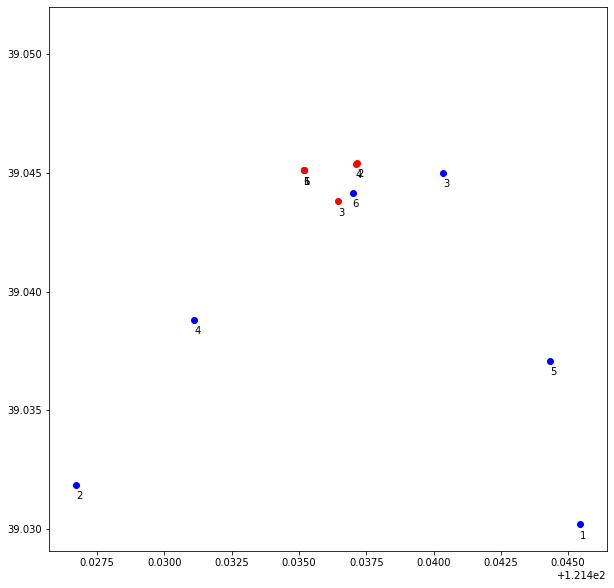

In [47]:
test_order_image=df_order[(df_order['date']=='20200301') & (df_order['courier_id']==100006950)]
plt.figure(figsize=(10,10))
plt.scatter(test_order_image['pick_lng'],test_order_image['pick_lat'],c='r')
for i in range(0,len(test_order_image)):
    plt.annotate(i+1,xy=(test_order_image['pick_lng'][i],test_order_image['pick_lat'][i]),
                 xytext=(test_order_image['pick_lng'][i],test_order_image['pick_lat'][i]-0.0006))
plt.scatter(test_order_image['deliver_lng'],test_order_image['deliver_lat'],c='blue')
for i in range(0,len(test_order_image)):
    plt.annotate(i+1,xy=(test_order_image['deliver_lng'][i],test_order_image['deliver_lat'][i]),
                 xytext=(test_order_image['deliver_lng'][i],test_order_image['deliver_lat'][i]-0.0006))
plt.show()

In [160]:
len(freq_list)

4219

In [136]:
freq_list=pd.DataFrame()
for i in range(29,35):
    a=pd.DataFrame(df_actions[i].groupby(['courier_id','wave_index']).apply(lambda x:[x['date'].values[0],sum(x['expect_time']==0)/len(x['expect_time'])]).values.tolist())
    freq_list=pd.concat([freq_list,a])
freq_list=freq_list.sort_values([0])

0.5493022091416262 0.125


(array([  66.,  134.,  242.,  464., 1186.,   96., 1632.,   87.,  281.,
          31.]),
 array([0.125 , 0.2025, 0.28  , 0.3575, 0.435 , 0.5125, 0.59  , 0.6675,
        0.745 , 0.8225, 0.9   ]),
 <a list of 10 Patch objects>)

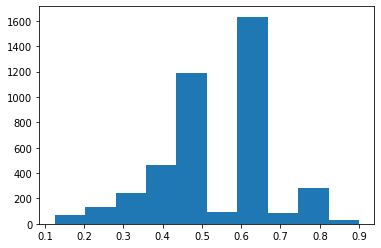

In [140]:
print(freq_list[1].mean(),freq_list[1].min())
plt.hist(freq_list[1])

In [181]:
sum_list=pd.DataFrame()
for i in range(29,35):
    a=pd.DataFrame(df_actions[i].groupby(['courier_id','wave_index']).apply(lambda x:[x['date'].values[0],sum(x['expect_time']==0)]).values.tolist())
    sum_list=pd.concat([freq_list,a])
sum_list=sum_list.sort_values([0])

In [193]:
sum_list.max()

0    20200301.0
1          16.0
dtype: float64

In [13]:
sum(df_order.groupby(['date','courier_id','wave_index']).size()==2)

38475

In [5]:
df_order.groupby('courier_id').size()

courier_id
10007871     494
10012191     625
10012508     479
10021791     239
10037225     171
            ... 
125864962    195
125891962     73
125892122     32
125964650    532
125996858    209
Length: 1000, dtype: int64

In [8]:
df_feature[df_feature['type']=='test'].groupby(['group']).size()

group
202003011000069500    8
202003011000236980    4
202003011000766510    4
20200301100078710     4
202003011001009150    4
                     ..
202003061246868175    3
202003061249734651    4
202003061251552411    6
202003061257796981    5
202003061258127301    3
Length: 4219, dtype: int64